# Mini-projet

- Sujet : Santé foetale
- Auteurs : Rémi Ançay & Lucas Charbonnier
- Professeur : Carlos Andrés Peña

## Analyse exploratoire de données

Source des données : https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

In [16]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/fetal_health.csv')

In [21]:
print("Nombre d'enregistrements :", len(df))

Nombre d'enregistrements : 2126


In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


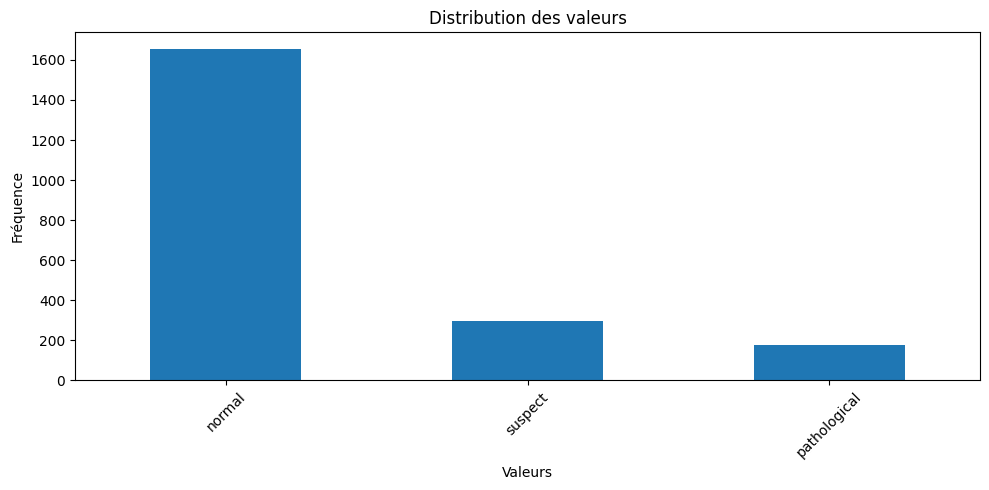

In [25]:
import matplotlib.pyplot as plt

value_counts = df['fetal_health'].value_counts()

plt.figure(figsize=(10, 5))
value_counts.plot(kind='bar')
plt.title("Distribution des valeurs")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.xticks([0,1,2],['normal', 'suspect', 'pathological'], rotation=45)
plt.tight_layout()
plt.show()


In [19]:
# Nombre total de NaN par colonne (trié, valeurs non nulles exclues)
nan_summary = df.isna().sum()
nan_summary = nan_summary[nan_summary > 0].sort_values(ascending=False)

# Résumé général
total_cells = df.size
total_nans = df.isna().sum().sum()
percent_nans = (total_nans / total_cells) * 100

# Aperçu condensé
print(f"Total de NaN dans le DataFrame : {total_nans} ({percent_nans:.2f}%)")
print(f"Nombre de colonnes avec au moins un NaN : {nan_summary.shape[0]} / {df.shape[1]}")

# Top 10 colonnes les plus affectées
print("\nTop 10 des colonnes avec le plus de NaN :")
print(nan_summary.head(10))


Total de NaN dans le DataFrame : 0 (0.00%)
Nombre de colonnes avec au moins un NaN : 0 / 22

Top 10 des colonnes avec le plus de NaN :
Series([], dtype: int64)


## Pré-traitement des données

todo normalisation

## Création du modèle

todo

## Modèle ante-hoc

todo

## Modèle post-hoc

todo

## Analyse des résultats

todo : pas oublier de justifier les choix des modèles

### Comparaison des modèles XAI

todo : comparaison des modèles ante-hoc et post-hoc -> performance + inteprétabilité

### Interprétations globales et locales

todo

